# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file= "traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import numpy as np

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0,:].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Question 1.
1. Provide a basic summary of the data set. In the code, the analysis should be done using python, numpy and/or pandas methods rather than hardcoding results manually.

Ans. The basic summary is computed through python and numpy and is displayed above.

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [3]:
### Creating Label Dictionary
import csv

label_dict = None
with open('signnames.csv', mode='r') as infile:
    reader = csv.reader(infile)
    next(reader, None)
    label_dict = {int(rows[0]):rows[1] for rows in reader}

C:\Users\AVIK\Anaconda2\envs\dlnd-tf-lab\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


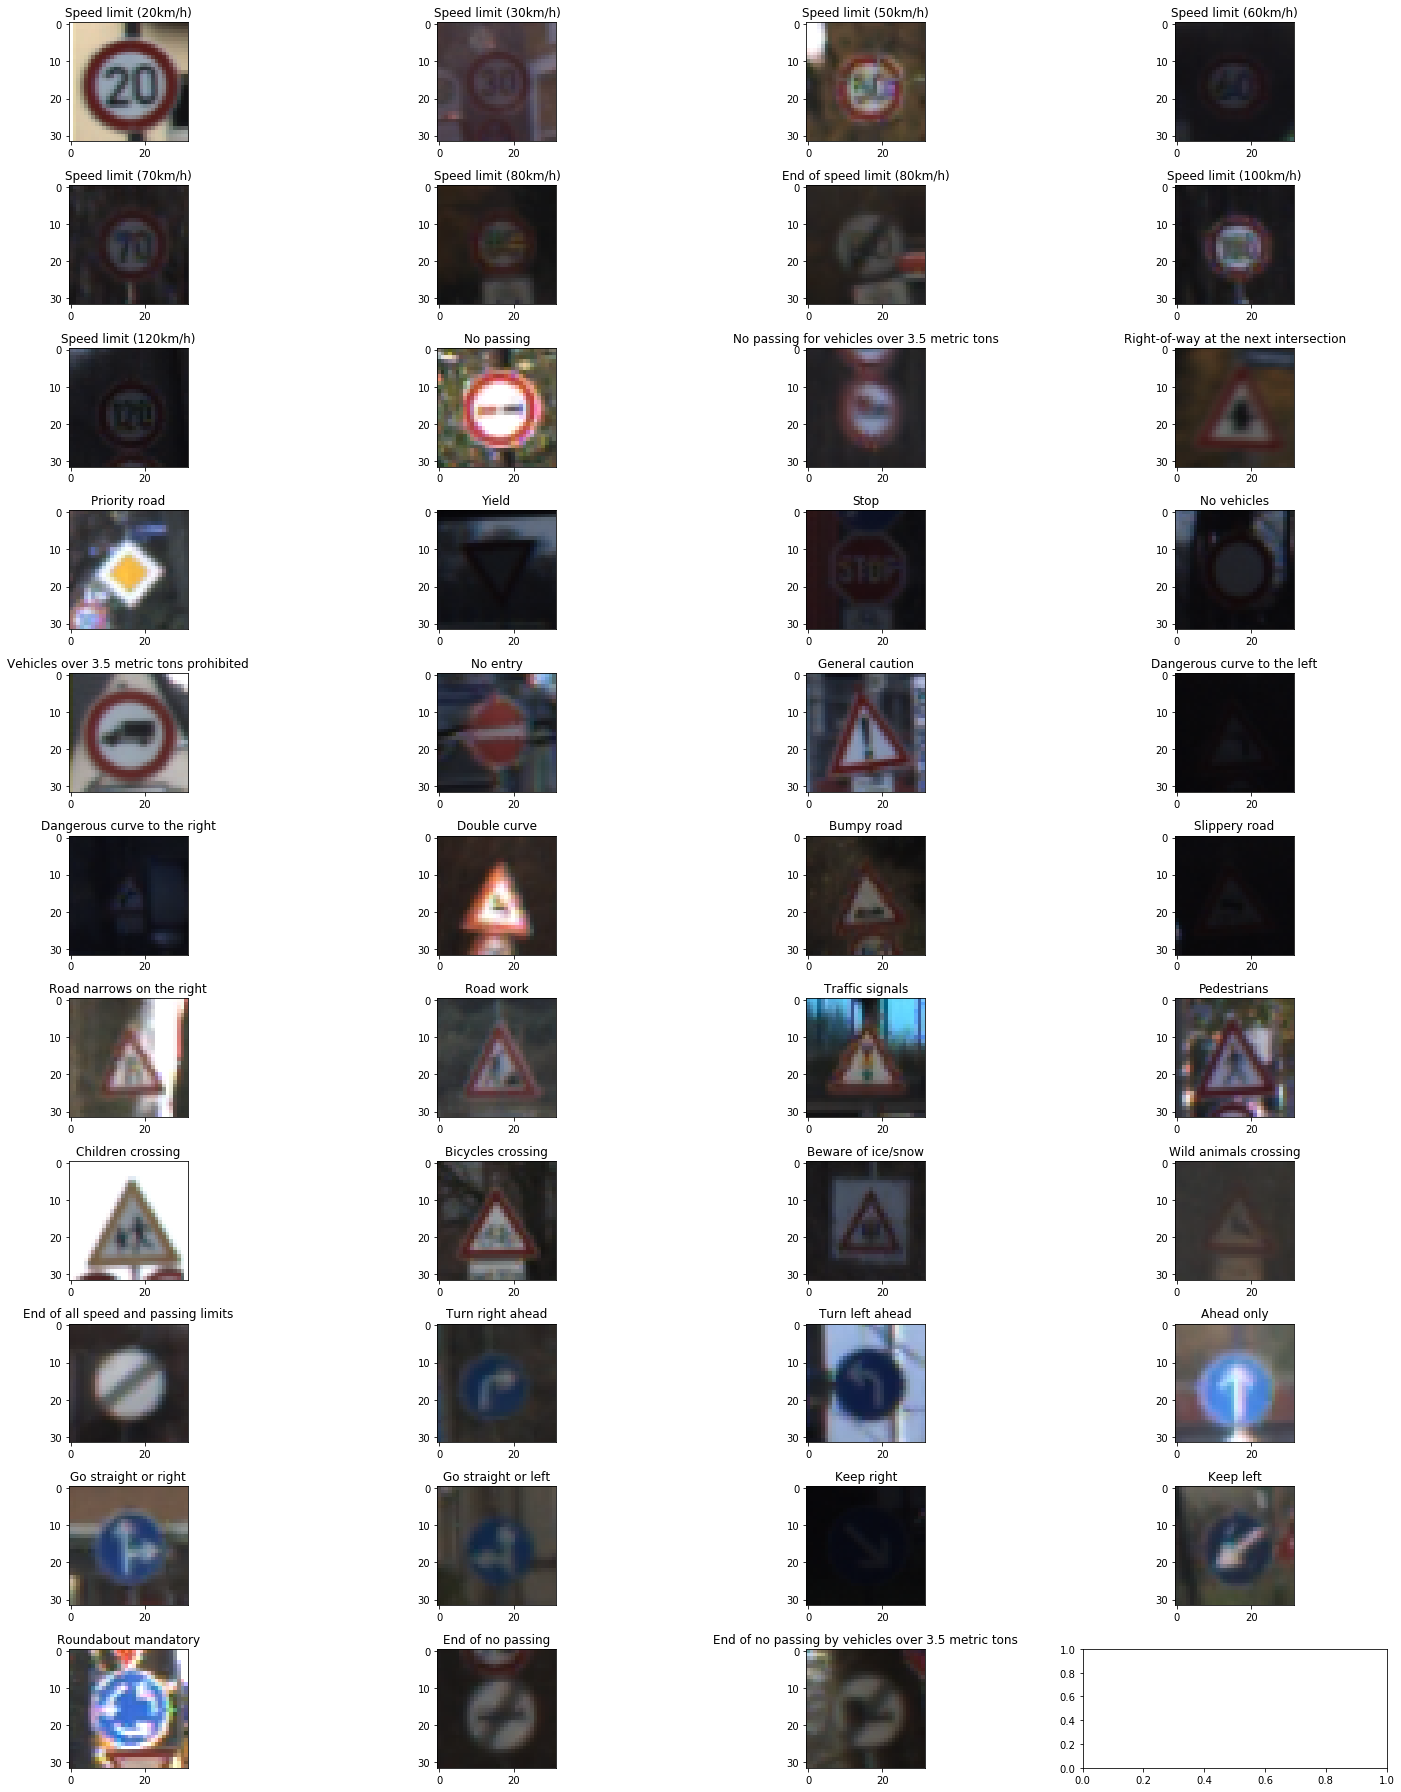

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
%matplotlib inline

num_classes = len(np.unique(y_train))
fig, axs = plt.subplots(int(num_classes/4)+1,4, figsize=(20, 25))
axs = axs.ravel()
for k in range(num_classes):
    idx = np.where(y_train==k)[0][0]
    axs[k].imshow(X_train[idx].squeeze(), cmap="gray")
    axs[k].set_title(label_dict[k])

fig.tight_layout()    
fig.show()    

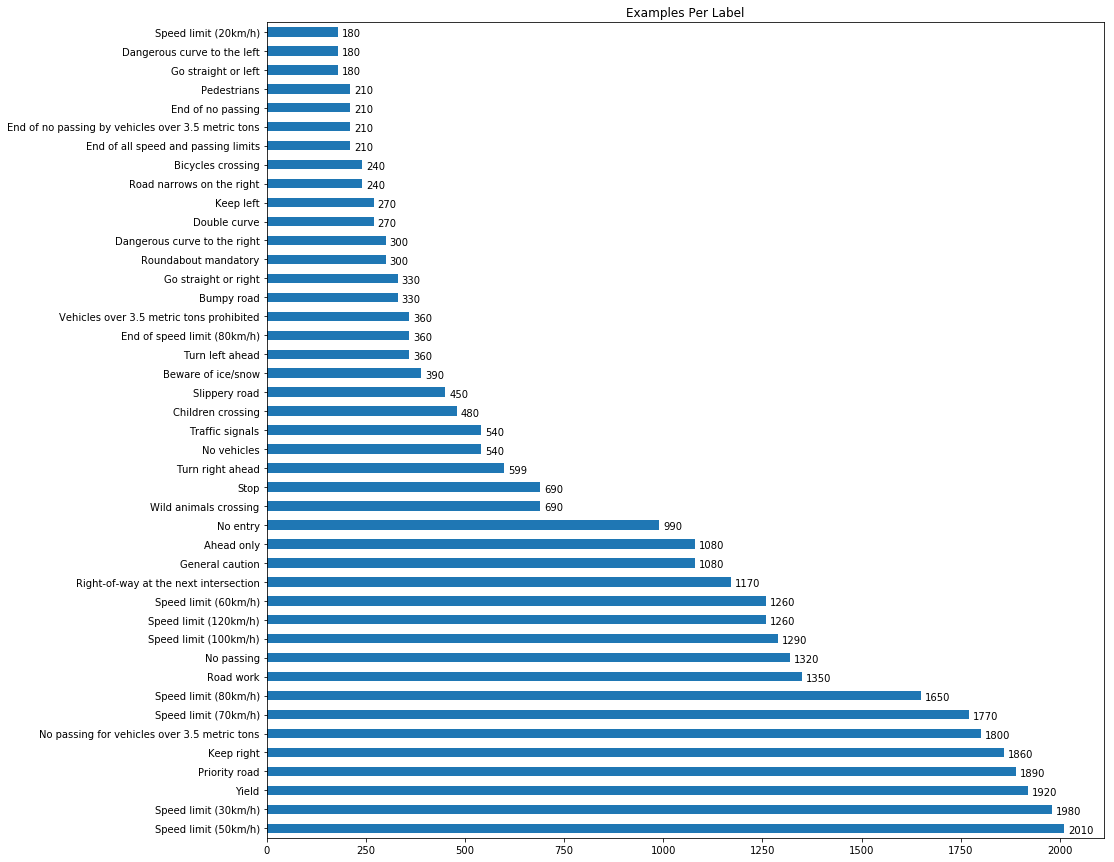

In [5]:
import pandas as pd

df = pd.DataFrame()
df['label'] = y_train
ax = df['label'].value_counts().plot(kind='barh', figsize = (15,15), title='Examples Per Label')
ax.set_yticklabels(list(map(lambda x: label_dict[x], df['label'].value_counts().index.tolist())))            

for i, v in enumerate(df['label'].value_counts()):
    ax.text(v + 10, i - 0.25, str(v))

Question 2.
Include an exploratory visualization of the dataset

Ans. The exploratory data analysis and visualization of the dataset is provided above cells




----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)
X_valid_gray = np.sum(X_valid/3, axis=3, keepdims=True)

X_train = (X_train_gray-128)/128
X_valid = (X_valid_gray-128)/128
X_test = (X_test_gray-128)/128

In [7]:
#from keras.preprocessing.image import ImageDataGenerator
#shift = 0.2
#datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift, rotation_range=10, vertical_flip=True)
#
#augmented_image_per_class = 2500
#X_train_aug = []
#y_train_aug = []
#
#for k in range(43):
#    index = np.where(y_train==k)
#    images_for_k = X_train[index]
#    y_k = y_train[index]
#
#    X_train_augmented_k = np.copy(images_for_k)
#    y_train_augmented_k = np.copy(y_k)
#
#    for X_batch,Y_batch in datagen.flow(images_for_k, y_k, batch_size=250):            
#        X_train_augmented_k = np.append(X_train_augmented_k, X_batch, axis=0)
#        y_train_augmented_k = np.append(y_train_augmented_k, y_batch, axis=0)
#
#        if len(y_train_augmented_k) >= augmented_image_per_class:
#            break
#            
#    X_train_aug.append(X_train_aug)
#    y_train_aug.append(y_train_aug)
#print(X_train_aug.shape())    

In [8]:
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)

In [9]:
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 128

Question 3
 Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc

Ans.
My preprocessing steps consist of:
1. Converting to grayscale
2. Normalizing the data to the range (-1,1) - This was done using the line of code X_train = (X_train - 128)/128.

I would had liked to do the data augmentation by ImageDataGenerator module in keras, it helps in making the model robust, but somehow had issues with keras installation/importing in present working PC. However without data augmentation too the trainig results achieves more than required 0.93 accuracy. 

### Model Architecture

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.


In [11]:
from tensorflow.contrib.layers import flatten

tf.reset_default_graph() 

def LeNet_mod(x, keep_prob=0.5):
    
    mu = 0
    sigma = 0.1
        
    # Layer 1: Convolutional. Output = 10x10x16.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID')
    conv1 = tf.nn.bias_add(conv1, conv1_b)
            
    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    #conv1 = tf.nn.dropout(conv1, 0.7)
    
    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID')
    conv2   = tf.nn.bias_add(conv2, conv2_b)
    #conv2 = tf.nn.dropout(conv2, 0.7)
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120
    fc1_W = tf.Variable(tf.truncated_normal(shape=(fc0.get_shape().as_list()[-1], 120),mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.add(tf.matmul(fc0, fc1_W), fc1_b)
     
    fc1 = tf.nn.dropout(fc1, keep_prob)
        
    # Activation.
    fc1    = tf.nn.relu(fc1)
        
    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(fc1.get_shape().as_list()[-1], 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.add(tf.matmul(fc1, fc2_W), fc2_b)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # Activation.
    fc2 = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(fc2.get_shape().as_list()[-1], 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.add(tf.matmul(fc2, fc3_W), fc3_b)
    
    return logits
    
 

Question 4. Describe what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

Ans. 
    I used the standard LeCun net fitting into the German Traffic Sign dataset, such as output labels as 43, and added regularization in form of adding dropout on the last 2 fully connected layers. The network architecture is as below - 
    1. 5x5 convolution (32x32x1 in, 28x28x6 out)
    2. ReLU
    3. 2x2 max pool (28x28x6 in, 14x14x6 out)
    4. 5x5 convolution (14x14x6 in, 10x10x16 out)
    5. ReLU
    6. 2x2 max pool (10x10x16 in, 5x5x16 out)
    7. Flatten layers from (5x5x16) to (400x1)
    8. Fully Connected Layer (400x1 in, 128x1 out)
    9. Dropout 
    10. Relu
    11. Fully connected layer (128x1 in, 84 out)
    12. Dropout
    13. Relu
    14. Fully connected layer (84 in, 43 out)
    15. Softmax (added through cost function)

In [12]:
X = tf.placeholder(tf.float32, shape = (None, 32, 32, 1))
Y = tf.placeholder(tf.int32, shape = [None])
keep_prob = tf.placeholder(tf.float32)
one_hot_Y = tf.one_hot(Y, 43)

In [13]:
def compute_cost(logits, labels):
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    
    return cost

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
learning_rate = 0.0009
prob = 0.6
logits = LeNet_mod(X, keep_prob)
cost = compute_cost(logits, one_hot_Y)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

In [15]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_Y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, prob):
    num_examples = len(y_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        end = offset+BATCH_SIZE
        batch_x, batch_y = X_data[offset:end], y_data[offset:end]
        accuracy = sess.run(accuracy_operation, feed_dict={X: batch_x, Y: batch_y, keep_prob:prob})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [16]:
from tqdm import tqdm
training_acc_hist = []
validation_acc_hist = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        for offset in tqdm(range(0, num_examples, BATCH_SIZE)):
            end = np.amin([offset + BATCH_SIZE,num_examples])
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(optimizer, feed_dict={X: batch_x, Y: batch_y, keep_prob:prob})
        
        training_accuracy = evaluate(X_train, y_train, prob)
        validation_accuracy = evaluate(X_valid, y_valid, 1.0)
        training_acc_hist.append(training_accuracy)
        validation_acc_hist.append(validation_accuracy)
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet_mod')
    print("Model saved")

Training...



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:37<00:00,  7.70it/s]


EPOCH 1 ...
Training Accuracy = 0.553
Validation Accuracy = 0.622



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:39<00:00,  7.42it/s]


EPOCH 2 ...
Training Accuracy = 0.745
Validation Accuracy = 0.825



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:37<00:00,  7.59it/s]


EPOCH 3 ...
Training Accuracy = 0.824
Validation Accuracy = 0.881



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:37<00:00,  7.56it/s]


EPOCH 4 ...
Training Accuracy = 0.856
Validation Accuracy = 0.892



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:37<00:00,  7.38it/s]


EPOCH 5 ...
Training Accuracy = 0.885
Validation Accuracy = 0.902



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:37<00:00,  7.60it/s]


EPOCH 6 ...
Training Accuracy = 0.898
Validation Accuracy = 0.914



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:37<00:00,  7.27it/s]


EPOCH 7 ...
Training Accuracy = 0.912
Validation Accuracy = 0.921



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:37<00:00,  7.62it/s]


EPOCH 8 ...
Training Accuracy = 0.923
Validation Accuracy = 0.927



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:39<00:00,  7.52it/s]


EPOCH 9 ...
Training Accuracy = 0.931
Validation Accuracy = 0.933



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:37<00:00,  7.74it/s]


EPOCH 10 ...
Training Accuracy = 0.933
Validation Accuracy = 0.929



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:38<00:00,  7.43it/s]


EPOCH 11 ...
Training Accuracy = 0.943
Validation Accuracy = 0.940



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:38<00:00,  7.31it/s]


EPOCH 12 ...
Training Accuracy = 0.941
Validation Accuracy = 0.936



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:37<00:00,  7.43it/s]


EPOCH 13 ...
Training Accuracy = 0.945
Validation Accuracy = 0.931



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:37<00:00,  7.51it/s]


EPOCH 14 ...
Training Accuracy = 0.951
Validation Accuracy = 0.944



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:38<00:00,  7.33it/s]


EPOCH 15 ...
Training Accuracy = 0.953
Validation Accuracy = 0.943



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:37<00:00,  7.51it/s]


EPOCH 16 ...
Training Accuracy = 0.957
Validation Accuracy = 0.944



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:38<00:00,  7.31it/s]


EPOCH 17 ...
Training Accuracy = 0.963
Validation Accuracy = 0.948



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:38<00:00,  7.20it/s]


EPOCH 18 ...
Training Accuracy = 0.963
Validation Accuracy = 0.950



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:38<00:00,  7.45it/s]


EPOCH 19 ...
Training Accuracy = 0.965
Validation Accuracy = 0.957



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:38<00:00,  7.26it/s]


EPOCH 20 ...
Training Accuracy = 0.962
Validation Accuracy = 0.954



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:38<00:00,  6.73it/s]


EPOCH 21 ...
Training Accuracy = 0.965
Validation Accuracy = 0.947



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:38<00:00,  7.47it/s]


EPOCH 22 ...
Training Accuracy = 0.965
Validation Accuracy = 0.952



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:38<00:00,  7.21it/s]


EPOCH 23 ...
Training Accuracy = 0.971
Validation Accuracy = 0.951



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:38<00:00,  7.29it/s]


EPOCH 24 ...
Training Accuracy = 0.970
Validation Accuracy = 0.942



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:38<00:00,  7.28it/s]


EPOCH 25 ...
Training Accuracy = 0.970
Validation Accuracy = 0.953



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:38<00:00,  7.39it/s]


EPOCH 26 ...
Training Accuracy = 0.975
Validation Accuracy = 0.955



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:38<00:00,  7.41it/s]


EPOCH 27 ...
Training Accuracy = 0.974
Validation Accuracy = 0.959



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:38<00:00,  7.58it/s]


EPOCH 28 ...
Training Accuracy = 0.974
Validation Accuracy = 0.954



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:38<00:00,  7.29it/s]


EPOCH 29 ...
Training Accuracy = 0.974
Validation Accuracy = 0.965



100%|████████████████████████████████████████████████████████████████████████████████| 272/272 [00:38<00:00,  7.53it/s]


EPOCH 30 ...
Training Accuracy = 0.975
Validation Accuracy = 0.954

Model saved


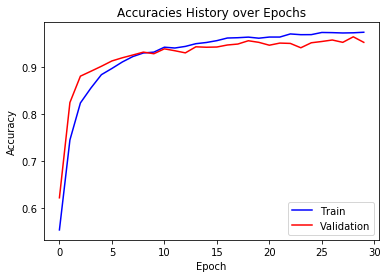

In [17]:
plt.plot(training_acc_hist, 'b')  # training accuracy
plt.plot(validation_acc_hist, 'r')  # validation accuracy
plt.title('Accuracies History over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

Question 5. Describe how you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate

Ans. For training the network, I used  learning rate of 0.0009, keep_prob of 0.6, and used Adam optimizer to train the modified LeCun net. Ran the optimzer over 30 epoches with batch size of 128.

In [18]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test, 1.0)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.941


Question 6. Describe the approach taken for finding a solution and getting the validation set accuracy to be at least 0.93. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

Ans. I tried out different hyper-parameters such as learning_rate, epoches, drop-out. I also played around with the architecture a bit, adding higher fully connected layers at the end of the net. However they didn't give good validation results. 

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [35]:
import matplotlib.image as mpimg
from PIL import Image
import os

# Read sample image files, resize them, convert to numpy arrays w/ dtype=uint8
test_images  = ['test_images/' + image_file for image_file in os.listdir('test_images')]
my_images = []
for test_image in test_images:
    image = Image.open(test_image)
    image = image.convert('RGB')
    image = image.resize((32, 32), Image.ANTIALIAS)
    image = np.asarray(image)
    image = np.reshape(image, (32, 32, 3))

    my_images.append(image)

# Visually inspect sample images
plt.fig_size(15,20)
for i, image in enumerate(my_images):
    plt.subplot(3, 3, i+1)
    plt.imshow(image)
    plt.title(test_images[i])

plt.tight_layout()
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'fig_size'

Question 7. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify

Ans. Above are the 5 German traffic signs I found on internet. Except for the padded zeros to resize the image as a32x32 image needed as input to the network we trained, the classification should be good in my opinion. 

In [20]:
my_images = np.asarray(my_images)

my_images_gry = np.sum(my_images/3, axis=3, keepdims=True)

my_images_normalized = (my_images_gry - 128)/128 

### Predict the Sign Type for Each Image

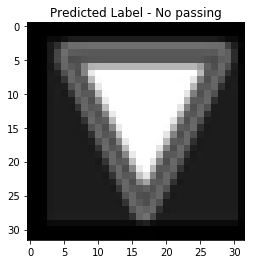

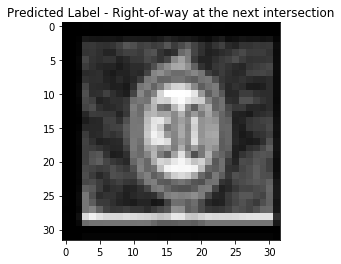

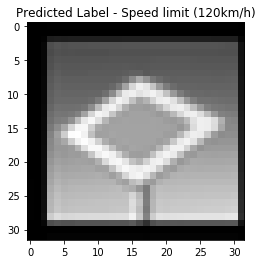

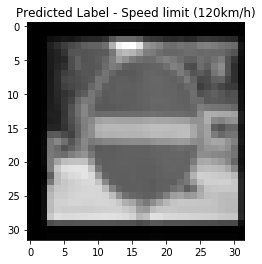

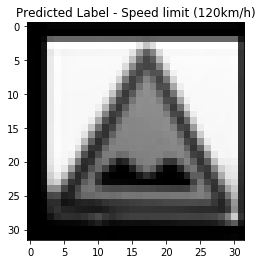

In [42]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
prob = 1.0
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    sess.run(tf.global_variables_initializer())
    classification = sess.run(tf.argmax(logits, 1), feed_dict={X: my_images_normalized, keep_prob:1.0})
  
for i, image in enumerate(my_images_normalized):
    plt.imshow(image.squeeze(), cmap="gray")           
    plt.title('Predicted Label - {}'.format(label_dict[classification[i]]))
    plt.show()       

Question 8.  Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set

Ans. The prediction result of hard classification is provided in the above cell and in the title of each image. However the results don't look correct - I used tf.argmax(logits, 1) but seems like tf.nn.top_k does work as expected. Need help on this one, if I should use the first value from top_k as predict label. But in the evaluate function, we used tf.argmax(logits,1)

### Analyze Performance

In [22]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

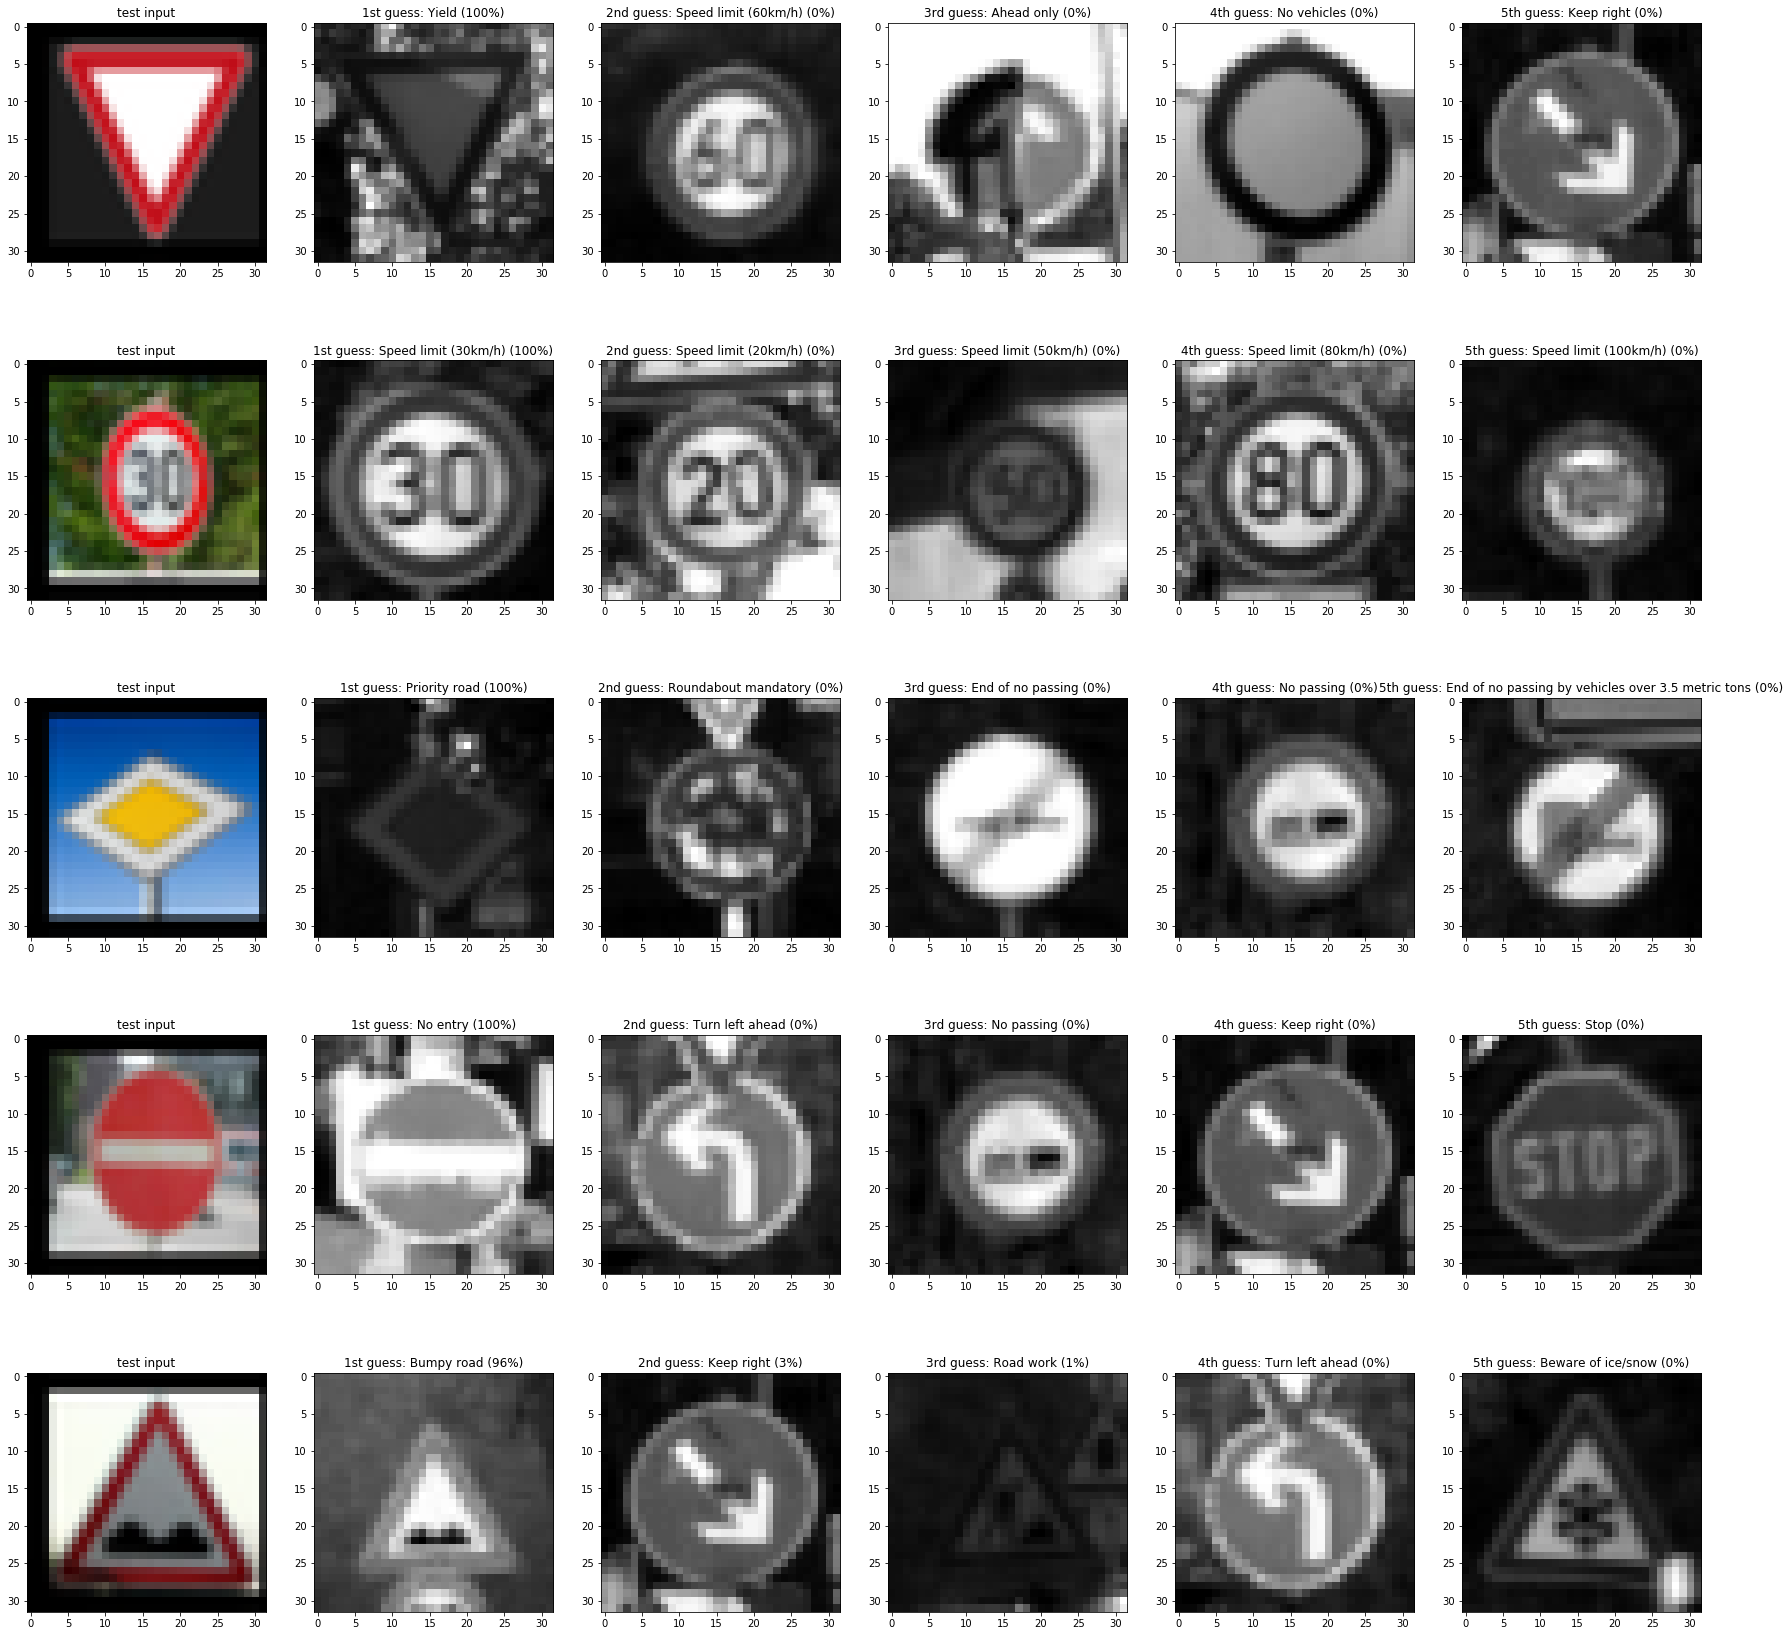

In [23]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet_mod.meta')
    saver.restore(sess, "./lenet_mod")
    my_top_k = sess.run(top_k, feed_dict={X: my_images_normalized, keep_prob:1.0})
    
    fig, axs = plt.subplots(len(my_images),6, figsize=(30, 30))
    axs = axs.ravel()

    for i, image in enumerate(my_images):
        axs[6*i].imshow(image)
        axs[6*i].set_title('test input')
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_train == guess1)[0]
        axs[6*i+1].imshow(X_train[index1].squeeze(), cmap='gray')
        axs[6*i+1].set_title('1st guess: {} ({:.0f}%)'.format(label_dict[guess1], 100*my_top_k[0][i][0]))
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_train == guess2)[0]
        axs[6*i+2].imshow(X_train[index2].squeeze(), cmap='gray')
        axs[6*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(label_dict[guess2], 100*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_train == guess3)[0]
        axs[6*i+3].imshow(X_train[index3].squeeze(), cmap='gray')
        axs[6*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(label_dict[guess3], 100*my_top_k[0][i][2]))
        guess4 = my_top_k[1][i][3]
        index4 = np.argwhere(y_train == guess4)[0]
        axs[6*i+4].imshow(X_train[index4].squeeze(), cmap='gray')
        axs[6*i+4].set_title('4th guess: {} ({:.0f}%)'.format(label_dict[guess4], 100*my_top_k[0][i][3]))
        guess5 = my_top_k[1][i][4]
        index5 = np.argwhere(y_train == guess5)[0]
        axs[6*i+5].imshow(X_train[index5].squeeze(), cmap='gray')
        axs[6*i+5].set_title('5th guess: {} ({:.0f}%)'.format(label_dict[guess5], 100*my_top_k[0][i][4]))

Question 9. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction. Provide the top 5 softmax probabilities for each image along with the sign type of each probability.

Ans. The softmax probabilities of each of the random traffic signs from internet is depicted in the above figure pictorially and the 5 guesses are provided in the title. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")